In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt
import string
import common as cm

In [2]:
ciphertext1 = "nrstymjwjytgjujwkjhynrmjwjytgjwjfqqfidlflf"

In [3]:
englishAlphabet = list(string.ascii_lowercase)

In [4]:
bookEnglish = open("./statics/PictureOfDorianGray.txt", "r", encoding='utf8')
counter = 0 
sampleNaturalLanguage = ""

for line in bookEnglish:
    sampleNaturalLanguage += cm.lclear(line.strip())
    counter += 1
    if counter > 5000: 
        break

In [5]:
frequencyTableNaturalLanguage = cm.getFrequencyTable(sampleNaturalLanguage, englishAlphabet)
frequencyTableChipher = cm.getFrequencyTable(ciphertext1, englishAlphabet)


cipherTextFrequenciesSorted = list(frequencyTableChipher.items())
cipherTextFrequenciesSorted.sort(key = lambda x: x[1], reverse = True)
naturalLanguageFrequenciesSorted = list(frequencyTableNaturalLanguage.items())
naturalLanguageFrequenciesSorted.sort(key = lambda x: x[1], reverse = True)

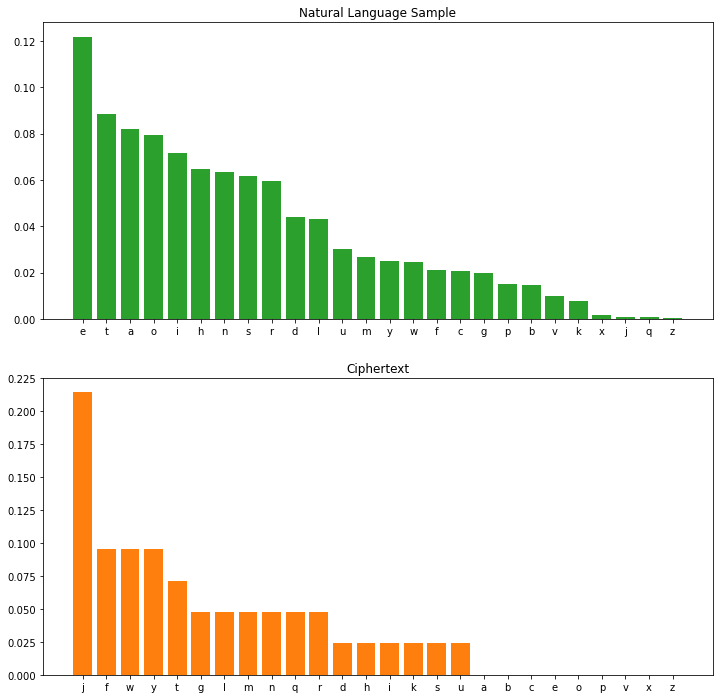

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

ax1.bar(
    list(map(lambda x: x[0] ,naturalLanguageFrequenciesSorted)),
    list(map(lambda x: x[1] ,naturalLanguageFrequenciesSorted)),
    color="tab:green"
)
ax1.set(title="Natural Language Sample")
ax2.bar(
    list(map(lambda x: x[0] ,cipherTextFrequenciesSorted)),
    list(map(lambda x: x[1] ,cipherTextFrequenciesSorted)),
    color="tab:orange"
)
ax2.set(title="Ciphertext")
plt.show()

In [7]:
possibleDecryption = {}
for i in range(len(cipherTextFrequenciesSorted)):
    possibleDecryption[englishAlphabet[i]] = englishAlphabet[(i - 5) % 26]
possibleDecryption[" "] = " "
    
print(possibleDecryption)
print(naturalLanguageFrequenciesSorted)

{'a': 'v', 'b': 'w', 'c': 'x', 'd': 'y', 'e': 'z', 'f': 'a', 'g': 'b', 'h': 'c', 'i': 'd', 'j': 'e', 'k': 'f', 'l': 'g', 'm': 'h', 'n': 'i', 'o': 'j', 'p': 'k', 'q': 'l', 'r': 'm', 's': 'n', 't': 'o', 'u': 'p', 'v': 'q', 'w': 'r', 'x': 's', 'y': 't', 'z': 'u', ' ': ' '}
[('e', 0.12191759136797921), ('t', 0.08848536222929189), ('a', 0.08207670978251434), ('o', 0.07932941494875631), ('i', 0.07170541646027911), ('h', 0.06466866500875763), ('n', 0.06349417093484622), ('s', 0.061727323328005554), ('r', 0.05953663655536207), ('d', 0.043859693916631345), ('l', 0.04322648841591389), ('u', 0.030286627618994123), ('m', 0.026880594804650996), ('y', 0.02517502514949267), ('w', 0.024643949568245765), ('f', 0.02125834273779675), ('c', 0.020553646293449898), ('g', 0.01996129276052066), ('p', 0.014951820210489764), ('b', 0.014609684980263393), ('v', 0.009860643724882424), ('k', 0.007838471319365365), ('x', 0.001562587767899545), ('j', 0.0009906602188644175), ('q', 0.0009702342349703057), ('z', 0.00042

In [8]:
decryptionAttempt = ""
for ch in ciphertext1:
    decryptionAttempt= decryptionAttempt + possibleDecryption[ch]
    
print(f"Cipher text : {ciphertext1}")
print(f"Decrypted message : {decryptionAttempt}\n")

Cipher text : nrstymjwjytgjujwkjhynrmjwjytgjwjfqqfidlflf
Decrypted message : imnotheretobeperfectimheretoberealladygaga



*******


In [9]:
ciphertext2 = "bljjubbcbzteqczfdqfcdlvucbzteqfefdcecbeyujtlvfwuetjtzeczlueyfejtlzebsczbetzjylvjycdd"

In [10]:
naturalLanguageAnalysis = cm.KGramAnalysis(textToAnalize=sampleNaturalLanguage, k=4)
fitnessTable, floorFitness = naturalLanguageAnalysis.calculateLogarithmicFitnessTable()

In [11]:
print(floorFitness)

-7.291870352977305


In [12]:
naturalLanguageAnalysis.fitnessMeasure('A mad dog is nothing more but a wicked creature.', fitnessTable, floorFitness)

-155.32905885823183

In [13]:
naturalLanguageAnalysis.fitnessMeasure(ciphertext2, fitnessTable, floorFitness)

-588.1643773364416

In [14]:
def encryptMessage(message: str, publicKey: list[int], alphabet: list[str]) -> str:
    message_lowercase = message.lower()
    ciphertext = ""

    for i in message_lowercase:
        if(i == " "):
            ciphertext = ciphertext + " "
        elif (i not in alphabet):
            continue
        else:
            nextChar = alphabet[publicKey[alphabet.index(i)]]
            ciphertext = ciphertext + nextChar

    return ciphertext

def decryptMessage(ciphertext: str, privateKey: list[int], alphabet: list[str]) -> str:
    return encryptMessage(ciphertext, privateKey, alphabet)

In [19]:
def crackSubstitutionCipher(cipher: str, kGramTools: cm.KGramAnalysis, alphabet: list[str], iterations: int = 100):
    fitnessTable, floorFitness = kGramTools.calculateLogarithmicFitnessTable()
    ciphertext = cm.lclear(cipher)
    maxkey = list(range(0, len(alphabet)))
    maxscore = -99e9
    parentScore,parentKey = maxscore, maxkey
    
    for i in range(1, iterations):
        random.shuffle(parentKey)
        possiblePlaintext = decryptMessage(ciphertext, parentKey, alphabet)
        parentScore = kGramTools.fitnessMeasure(possiblePlaintext, fitnessTable, floorFitness)
        
        count = 0
        while count < 1000:
            a = random.randint(0,25)
            b = random.randint(0,25)
            childKey = parentKey[:]
            childKey[a],childKey[b] = childKey[b],childKey[a]
            candidateDecryption = decryptMessage(ciphertext, childKey, alphabet)
            childScore = kGramTools.fitnessMeasure(candidateDecryption, fitnessTable, floorFitness)
            if childScore > parentScore:
                parentScore = childScore
                parentKey = childKey[:]
                count = 0
            count += 1
        
        if parentScore > maxscore:
            maxscore,maxkey = parentScore,parentKey[:]
            print('\nbest score so far:',maxscore,'on iteration',i)
            ss = decryptMessage(ciphertext, maxkey, englishAlphabet)
            print('    best key: '+''.join(str(maxkey)))
            print('    plaintext: '+ss)
    
    return maxkey

In [20]:
decryptionKey = crackSubstitutionCipher(ciphertext2, naturalLanguageAnalysis, englishAlphabet)


best score so far: -441.4248813416105 on iteration 1
    best key: [22, 17, 20, 2, 14, 3, 12, 1, 25, 11, 10, 0, 23, 21, 9, 6, 5, 15, 7, 4, 19, 13, 24, 16, 8, 18]
    plaintext: ralltrrurseofusdcfducanturseofdodcuouroitleandytoelesousatoidoleasorhusroeslianliucc

best score so far: -436.948949380475 on iteration 3
    best key: [1, 17, 19, 7, 14, 6, 16, 21, 10, 11, 12, 8, 15, 23, 2, 25, 20, 5, 3, 18, 0, 13, 22, 9, 24, 4]
    plaintext: rillarrtresouteghugthinatresougoghtotroyalsingwaoslseoteiaoygolsieordteroselyinlythh

best score so far: -415.7034407780266 on iteration 5
    best key: [1, 19, 14, 5, 3, 4, 21, 9, 15, 18, 10, 8, 2, 6, 16, 25, 11, 24, 22, 0, 13, 12, 20, 23, 7, 17]
    plaintext: tissnttotradlorefleofimnotradledefodotdhnsaimeundasardorindhedsairdtwortdarshimshoff

best score so far: -393.7834299533208 on iteration 13
    best key: [25, 18, 8, 2, 19, 0, 6, 23, 3, 5, 22, 17, 21, 1, 9, 16, 7, 20, 15, 14, 4, 24, 12, 10, 11, 13]
    plaintext: srffessisnothinachaicryeisnothata

In [21]:
decryptMessage(ciphertext2, decryptionKey, englishAlphabet)

'successisnotminalmailureisnotmatalitisthecouragetocontinuethatcountsfinstonchurchill'

----------